Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like the one below one, starting from scratch, and following best practices for reproducible research.

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you are unsure about anything!
1. When documenting your project, please keep the following questions in your mind:
   * _If I found this GitHub repository, and wanted to fully reproduce the analysis, what information would I want?_
   * _What information would I need?_

## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [1]:
# Source: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

import json
import requests

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                 # for end use 1st day of month following final month of data
                 "end" : "2020100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020101000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/mvrcx',
    'From': 'marc.oprisiu@fu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [2]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
example_monthly_pageviews 

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'views': 4376666686},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'views': 4332482183},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'views': 4485491704},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'views': 4477532755},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'views': 4287720220},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015120100',
   'views': 4100012037},
  {'project': 'en.wikipedia',
   'access': 

In [3]:
example_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)
example_monthly_legacy

{'items': [{'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2007120100',
   'count': 2998331524},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008010100',
   'count': 4930902570},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008020100',
   'count': 4818393763},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008030100',
   'count': 4955405809},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008040100',
   'count': 5159162183},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008050100',
   'count': 5584691092},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timest

Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There is about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

### Query, collect, and store data
1. Setting Parameters for Pageview desktop/mobilesite/mobileapp and Pagecount desktop/mobile
2. Query the data by calling the api with respective parameters
3. Creating needed folders to directory
4. Saving the collected data to JSON in `raw_data/` directory

In [4]:
# Setting parameters for pageview desktop
pageviews_desktop_param = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    "end" : '2020101000'
                        }

# Setting parameters for pageview mobile site
pageviews_mobilesite_param = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    "end" : '2020101000'
                        } 

# Setting parameters for pageview mobile app
pageviews_mobileapp_param = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    "end" : '2020101000'
                        } 

# Setting parameters for legacy desktop
legacy_desktop_param = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                 "end" : "2020100100"
                    }

# Setting parameters for legacy mobile
legacy_mobile_param = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                 "end" : "2020100100"
                    }

# Querying the data
pageviews_monthly_desktop = api_call(endpoint_pageviews, pageviews_desktop_param)
pageviews_monthly_mobilesite = api_call(endpoint_pageviews, pageviews_mobilesite_param)
pageviews_monthly_mobileapp = api_call(endpoint_pageviews, pageviews_mobileapp_param)
legacy_monthly_desktop = api_call(endpoint_legacy, legacy_desktop_param)
legacy_monthly_mobile = api_call(endpoint_legacy, legacy_mobile_param)

###################################################
# I MEAN THIS COULD'VE BEEN DONE MORE EFFICIENTLY #
###################################################

# Creating directories, 
# Source: https://stackoverflow.com/questions/11373610/save-matplotlib-file-to-a-directory
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

# Create directory for all raw json files
mkdir_p('raw data')
mkdir_p('raw data/json')
            
            
# Saving the queries to files
with open('raw data/json/pagecounts_desktop-site_200101_202010.json', 'w', encoding='utf-8') as file:
    json.dump(pageviews_monthly_desktop, file, ensure_ascii=False, indent=4)
    
with open('raw data/json/pagecounts_mobile-site_200101_202010.json', 'w', encoding='utf-8') as file:
    json.dump(pageviews_monthly_mobilesite, file, ensure_ascii=False, indent=4)

with open('raw data/json/pagecounts_mobile-app_200101_202010.json', 'w', encoding='utf-8') as file:
    json.dump(pageviews_monthly_mobileapp, file, ensure_ascii=False, indent=4)
    
with open('raw data/json/legacy_desktop-site_200101_202010.json', 'w', encoding='utf-8') as file:
    json.dump(legacy_monthly_desktop, file, ensure_ascii=False, indent=4)

with open('raw data/json/legacy_mobile-site_200101_202010.json', 'w', encoding='utf-8') as file:
    json.dump(legacy_monthly_mobile, file, ensure_ascii=False, indent=4)    

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 






### Creating corresponding dataframes, merging mobilesite and mobileapp data and doing some reindexing

In [10]:
import pandas as pd

###################################
# BEGINNING OF FIRST BULLET POINT #
###################################

# Pageviews mobile site views into dataframe
pv_mobilesite_df = pd.DataFrame((list(pageviews_monthly_mobilesite.values())[0]),columns = ['access','timestamp', 'views'])
#pv_mobilesite_df

# Pageviews mobile app views into dataframe
pv_mobileapp_df = pd.DataFrame((list(pageviews_monthly_mobileapp.values())[0]),columns = ['access','timestamp', 'views'])
#pv_mobileapp_df

# Merging the two dataframes of mobile-site and mobile-app access
new = pv_mobilesite_df.merge(pv_mobileapp_df, on='timestamp')
#new

# Swapping columns bc i didnt like it the other way around 
columns_titles = ["timestamp","access_x","views_x","access_y","views_y"]
pv_total_mobile_df = new.reindex(columns=columns_titles)

# Adding new column "total mobile" as a sum of views_x and views_y
pv_total_mobile_df['total_mobile'] = pv_total_mobile_df.loc[:,['views_x','views_y']].sum(axis=1)
#pv_total_mobile_df

###################################
#    END OF FIRST BULLET POINT    #
###################################

### Merging, remaining dataframes
Pretty sure the following could've been done more efficiently &nbsp;   ¯\\_(ツ)_/¯ <br> Strip year and month from timestamp and add those as new columns.<br>Also add `mobilesite + mobileapp` as `totalmobile`.<br> See resulting dataframe below to understand what I mean.

In [6]:
####################################
# BEGINNING OF SECOND BULLET POINT #
####################################

# Pageviews mobile site views into dataframe
pv_mobilesite_df = pd.DataFrame((list(pageviews_monthly_mobilesite.values())[0]),columns = ['access','timestamp', 'views'])
#pv_mobilesite_df

#Split year (first 4 characters) and month (5th and 6th character)
pv_mobilesite_df['year'] = ""
pv_mobilesite_df['month'] = ""
pv_mobilesite_df['year'] = pv_mobilesite_df.timestamp.str[:4]
pv_mobilesite_df['month'] = pv_mobilesite_df.timestamp.str[4:6]
new_pv_mobilesite_df = pv_mobilesite_df
#new_pv_mobilesite_df

# Swapping columns 
columns_titles = ["year", "month", "access","views"]
new_pv_mobilesite_df = new_pv_mobilesite_df.reindex(columns=columns_titles)
#new_pv_mobilesite_df    

# Doing basically the same for pageviews mobile app views
pv_mobileapp_df = pd.DataFrame((list(pageviews_monthly_mobileapp.values())[0]), columns = ['access','timestamp','views'])
pv_mobileapp_df['year'] = ""
pv_mobileapp_df['month'] = ""
pv_mobileapp_df['year'] = pv_mobileapp_df.timestamp.str[:4]
pv_mobileapp_df['month'] = pv_mobileapp_df.timestamp.str[4:6]
new_pv_mobileapp_df = pv_mobileapp_df
new_pv_mobileapp_df = new_pv_mobileapp_df.reindex(columns=["year", "month", "access","views"])
#new_pv_mobileapp_df

# Pageviews total mobile
pv_total_mobile_df['year'] = ""
pv_total_mobile_df['month'] = ""
pv_total_mobile_df['year'] = pv_total_mobile_df.timestamp.str[:4]
pv_total_mobile_df['month'] = pv_total_mobile_df.timestamp.str[4:6]
pv_total_mobile_df['access'] = "mobile"
new_pv_totalmobile_df = pv_total_mobile_df
new_pv_totalmobile_df = new_pv_totalmobile_df.reindex(columns=["year", "month", "access", "total_mobile"])
#new_pv_totalmobile_df

# Pageviews desktop views
pv_desktop_df = pd.DataFrame((list(pageviews_monthly_desktop.values())[0]),columns = ['access','timestamp', 'views'])
pv_desktop_df['year'] = ""
pv_desktop_df['month'] = ""
pv_desktop_df['year'] = pv_desktop_df.timestamp.str[:4]
pv_desktop_df['month'] = pv_desktop_df.timestamp.str[4:6]
new_pv_desktop_df = pv_desktop_df
new_pv_desktop_df = new_pv_desktop_df.reindex(columns=["year", "month", "access","views"])
#new_pv_desktop_df

# Legacy mobile views
lg_mobile_df = pd.DataFrame((list(legacy_monthly_mobile.values())[0]), columns = ['access-site', 'timestamp', 'count'])
lg_mobile_df['year'] = lg_mobile_df['month'] = ""
lg_mobile_df['year'] = lg_mobile_df.timestamp.str[:4]
lg_mobile_df['month'] = lg_mobile_df.timestamp.str[4:6]
new_lg_mobile_df = lg_mobile_df
new_lg_mobile_df= new_lg_mobile_df.reindex(columns=["year", "month", "access-site", "count"])
#new_lg_mobile_df

# Legacy Desktop views
lg_desktop_df = pd.DataFrame((list(legacy_monthly_desktop.values())[0]), columns = ['access-site', 'timestamp', 'count'])
lg_desktop_df['year'] = lg_desktop_df['month'] = ""
lg_desktop_df['year'] = lg_desktop_df.timestamp.str[:4]
lg_desktop_df['month'] = lg_desktop_df.timestamp.str[4:6]
new_lg_desktop_df = lg_desktop_df
new_lg_desktop_df= new_lg_desktop_df.reindex(columns=["year", "month", "access-site", "count"])
#new_lg_desktop_df
#new_lg_mobile_df
new_pv_totalmobile_df
#new_pv_desktop_df

###################################
#    END OF SECOND BULLET POINT   #
###################################

,year,month,access,total_mobile
0,2015,07,mobile,3288755294
1,2015,08,mobile,3302333038
2,2015,09,mobile,3170203333
3,2015,10,mobile,3268499132
4,2015,11,mobile,3236601070
...,...,...,...,...
58,2020,05,mobile,5231700095
59,2020,06,mobile,4573975256
60,2020,07,mobile,4809714465
61,2020,08,mobile,4803308661


## Combining all data

The goal is to have a dataframe that looks like this:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

1. For this, a new dataframe is being initialized containing two columns: `year`, `month`
2. Setting the year and month range by copying the dataframe with the maximum amount years. I end up with this

| year | month |
|------|-------|
| 2015 | 07    |
| .... | ..    |
| 2020 | 09    |

3. Start joining dataframes to combine all data into single dataframe using outer joins
4. Calculate the `pageview_all_views` as sum of `pageview_desktop_views + pageview_mobile_views`
5. Calculate the `pagecount_all_views` as sum of `pagecount_desktop_views + pagecount_mobile_views`
6. Creating new directory for clean data
7. Saving the dataframe to `clean_data/result.csv` and to `clean_data/result.xlsx` because I like excel

In [7]:
############################################
# COMBINING ALL DATA INTO SINGLE DATAFRAME #
############################################

# Creating DataFrame with Columns: Year, Month (will be needed for joining later)
result = pd.DataFrame(columns=['year', 'month'])

# Initialize year and month range
result['year'] = new_lg_desktop_df['year']
result['month'] = new_lg_desktop_df['month']

# Merging result table with Pagecount mobile views and renaming column afterwards
result = pd.merge(result, new_lg_mobile_df[['year','month','count']], on=['year','month'], how='outer')
result = result.rename(columns = {'count': 'pagecount_mobile_views'})

# Merging result table wirth pagecount desktop views, renaming and rearrangeing
result = pd.merge(result, new_lg_desktop_df[['year','month','count']], on=['year','month'], how='outer')
result = result.rename(columns = {'count': 'pagecount_desktop_views'})
result = result.reindex(columns=['year','month','pagecount_desktop_views', 'pagecount_mobile_views'])

# Adding pagecount desktop + mobile
sum_pagecount = result["pagecount_desktop_views"] + result["pagecount_mobile_views"]
result["pagecount_all_views"] = sum_pagecount
result = result.reindex(columns=['year','month','pagecount_all_views','pagecount_desktop_views', 'pagecount_mobile_views'])

# Adding column for pageview_all_views
result['pageview_all_views']=""

# Adding pageview_desktop_views
result = pd.merge(result, new_pv_desktop_df[['year', 'month', 'views']], on=['year','month'], how='outer')
result = result.rename(columns = {'views': 'pageview_desktop_views'})

# Adding pageview_mobile_views
result = pd.merge(result, new_pv_totalmobile_df[['year','month','total_mobile']], on=['year','month'],how='outer')
result = result.rename(columns={'total_mobile':'pageview_mobile_views'})

# Summing pageview desktop+mobile
sum_pageview = result['pageview_desktop_views']+result['pageview_mobile_views']
result['pageview_all_views'] = sum_pageview
final_result = result

# Making directory for csv file
mkdir_p('clean data')

# Exporting dataframe to Excel
final_result.to_excel('clean data/result.xlsx', index=False)

# Exporting dataframe to csv
final_result.to_csv('clean data/result.csv', index=False)
#final_result
final_result

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,NaN,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,01,NaN,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,02,NaN,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,03,NaN,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,04,NaN,5.159162e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
149,2020,05,NaN,NaN,NaN,8.309794e+09,3.078094e+09,5.231700e+09
150,2020,06,NaN,NaN,NaN,7.295304e+09,2.721329e+09,4.573975e+09
151,2020,07,NaN,NaN,NaN,7.448651e+09,2.638936e+09,4.809714e+09
152,2020,08,NaN,NaN,NaN,7.416367e+09,2.613058e+09,4.803309e+09


## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

### Analyzing the given data

Ok, so i figured out, that if you have data from pageview_mobile and data from pagecount_mobile it doesnt make sense to sum those up, since they are basically counting the same access type thats why i decided to calculate the average of the two provided data sources and plot it. And thats exactly whats happening here:

In [8]:
# Extract all needed data: mobiletraffic, desktoptraffic, alltrafic
step3 = pd.DataFrame(columns=['year', 'month'])
step3[['year','month']] = final_result[['year','month']]

# Calculating the mean for months that provide pageview and pagecount data (desktop):
column_desktop = final_result.loc[: , ["pagecount_desktop_views","pageview_desktop_views"]]
step3['desktop traffic'] = column_desktop.mean(axis=1)
#step3

# Calculating the mean for months that provide pageviews and pagecount data (mobile):
column_mobile = final_result.loc[:,["pagecount_mobile_views", "pageview_mobile_views"]]
step3['mobile traffic'] = column_mobile.mean(axis=1)

# Adding mobile mean + desktop mean traffic
step3['all traffic'] = step3.fillna(0)['desktop traffic'] + step3.fillna(0)['mobile traffic']

# Displaying all rows
pd.set_option('display.max_rows', step3.shape[0]+1)

# As a result I get a Dataframe with the following columns:
step3 # <-- Year | Month | desktop traffic | mobile traffic | all traffic

# Exporting result to csv
mkdir_p('result')
step3.to_csv('result/result data.csv', index=False)


## Plotting data

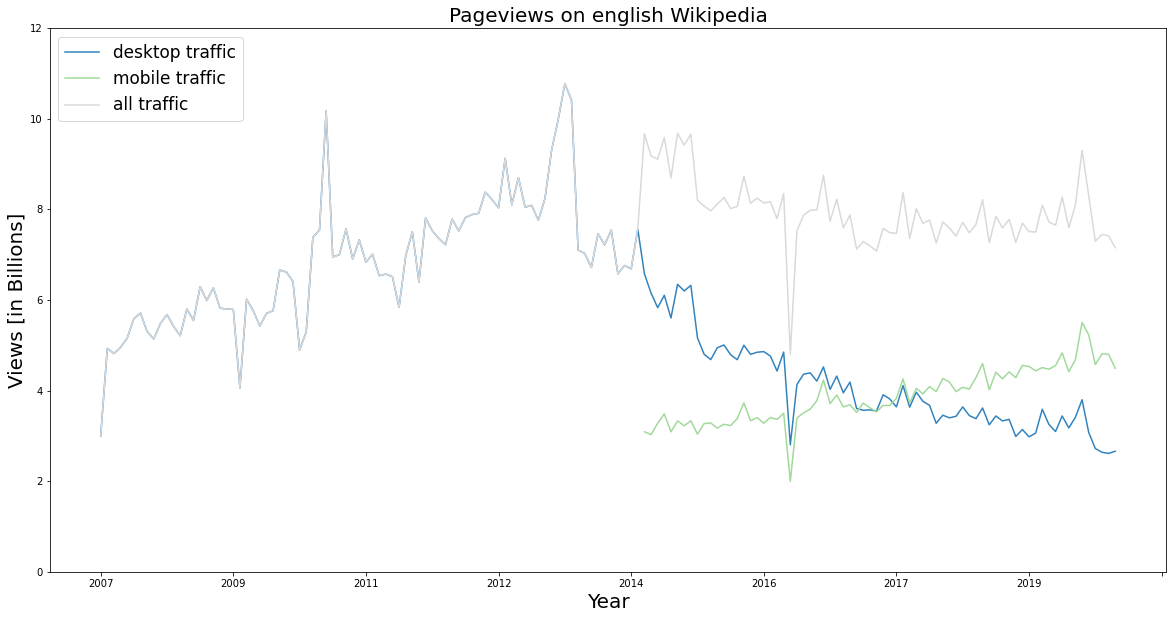

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("result/result data.csv") 

ax = step3.plot(figsize=(20,10), x='year', colormap='tab20c', title='Pageviews on english Wikipedia')
ax.set_xlabel("Year", size=20)
ax.set_ylabel("Views [in Billions]", size=20)

####################################
### Some beauty work from now on ###
####################################

# Scaling y_axis to billions = 10^9
# Source: https://stackoverflow.com/questions/10171618/changing-plot-scale-by-a-factor-in-matplotlib
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

# Limiting y_axis with y_min = 0 and y_max = 12.000.000.000 = 12e9]
# Source: https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
ax.set_ylim([0,12e9])

# Changing position/size of legend because why tf did it cover my graph
# Source: https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
ax.legend(loc=2, prop={'size': 17})

# Making title bigger
ax.set_title(label='Pageviews on english Wikipedia', fontsize=20)
ax = ax.plot()

# Creating directory for img file (if not existent)
mkdir_p('img')

# Saving figure to png
plt.savefig('result/result graph.png', dpi=300)



***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).